In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
# Add the path to the utils folder to sys.path
utils_path = Path('../python').resolve()
sys.path.append(str(utils_path))


import rasterio
import numpy as np
from pathlib import Path
from process_utils import (preprocess_data,
                           superpixel_segmentation)
from rio_utils import (reproject_arr_to_match_profile)

In [2]:
# === Load Opera_Sentinel1 Image ===
def open_one(path):
    with rasterio.open(path) as ds:
        band = ds.read(1)  # Read the first band
        profile = ds.profile
    return band, profile

In [3]:
tifs = [
    Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/final_merged_image.tif"),
    # Path("/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Post_alpha_perimeter_data/post_merged_alpha_image_test_before_imputed.tif"),
]
tifs

[PosixPath('/shared/Wildfire/Bety_wildfire_project/Bety_data_test/final_merged_image.tif')]

In [4]:
# Open both images
bands, profiles = zip(*map(open_one, tifs))
opera_ascend = bands[0]
# alpha_post = bands[1]
profile_opera_ascend = profiles[0]
# profile_post = profiles[1]

Preprocess the image
Applies interpolation, clipping, total-variation denoising, and background mask

Parameters

interpolation (bool): whether or not to perform nearest neighbor interpolation for the preprocessing
weight (float): denoising weight. The greater the weight, the more denoising (at the expense of fidelity to image).

In [5]:
interpolation = True
weight = 5

In [6]:
# === Step 3: Preprocess (Interpolation, Denoising) ===
opera_ascend = preprocess_data(opera_ascend, interpolation, weight)
# alpha_post = preprocess_data(alpha_post, interpolation, weight)
print("Preprocessing done")

Preprocessing done


In [7]:
# # === Step 4: Reproject post image to match pre ===
# alpha_post, _ = reproject_arr_to_match_profile(
#     alpha_post, profile_post, profile_pre, resampling='bilinear')
# alpha_post = alpha_post[0]  # Get back to 2D
# print("Reprojection done")

In [8]:
print("opera_ascend", opera_ascend.shape)

opera_ascend (1007, 1069)


In [9]:
# === Save Postfire alpha1 ===
opera_ascend_out_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/final_merged_image.npy"
np.save(opera_ascend_out_path, opera_ascend)

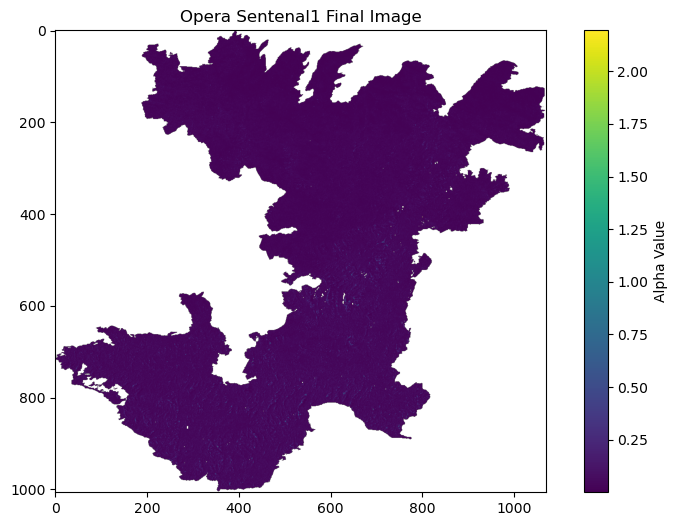

In [11]:
# Load the images
opera_ascend, profile_opera_ascend = open_one(tifs[0])
# alpha_post, profile_post = open_one(tifs[1])

# Display function
def show_alpha_image(data, title):
    plt.figure(figsize=(10, 6))
    plt.imshow(data)
    plt.colorbar(label="Alpha Value")
    plt.title(title)
    # plt.axis("off")
    plt.show()

# Show the images
show_alpha_image(opera_ascend, "Opera Sentenal1 Final Image")
